# Final Lab

## Q1 - Hölder continuity of $f_a$
First of all, we show that to maximize $k+\alpha$, we want $k$ to be maximum such that $f_a^{(k)}$ is continuous. Suppose that for some $k^*$ and $\alpha^*$, $f \in C^{k^*, \alpha^*}([-1,1])$, and there exists $k> k^*$ with  $f^{(k)}$ conitnuous. We know that $k \geq k^*+1$ and $f \in C^{k,\alpha}([-1,1])$ for some $0<\alpha \leq 1$, so we have $$(k+\alpha)- (k^*+\alpha^*) = (k-k^*) - (\alpha-\alpha^*) \geq 1-1 =  0.$$
Therefore, we can start by finding the maximum $k$ and subsequently find the maximum $\alpha$ for that $k$. Looking at the derivative of $f_a$, we observe that for $f_a$ to be $k$ times continuously differentiable, the $k$-th derivative of $x^a$ must go to 0 when $x \rightarrow 0$. This means, we can only derive until the exponent of $x$ is just above 0, otherwise, the derivative will no go to 0. Then, it is clear to see that $k = \lfloor a \rfloor$ when $a$ is not an integer but $k = a-1$ when it is.

Second, we need to compute $\alpha$. Note that we do not have to take the supremum on the whole domain because the $k$-th derivative is constant on $[-1,0]$ and continuous in $[-1,1]$, so there is no unbounded values. Moreover, from the discussion above, we infer that $f_a^(k) = Cx^b$ for $0 < b \leq 1$ (one can add that for $a \notin \mathbb{N}$, $b$ is the fractional part of $a$, otherwise $b=1$). The constant $C$ is just the coefficients that arrive when taking the multiple derivatives of $x^a$, but it is not relevant to us. We claim that for $\alpha > b$, $f_a^{(k)}$ is not $\alpha$-Hölder continuous. It follows from this derivation:
$$ \begin{align*}
    \sup_{0 \leq x < y \leq 1} \frac{|Cy^b-Cx^b|}{|y-x|^{\alpha}} &\geq \sup_{0 \leq x \leq 1} \frac{|C(2x)^b-Cx^b|}{|2x-x|^{\alpha}}\\
    &= C(2^b-1)\cdot \sup_{0 \leq x \leq 1} \frac{|x|^b}{|x|^{\alpha}}\\
    &= \infty \mbox{ (take $x \rightarrow 0$)}
\end{align*} $$

Finally, we claim that $f_a^{(k)}$ is $b$-Hölder continuous and this follows from the fact that $|y^b-x^b| \leq |y-x|^b$, so the term in the supremum is always smaller than 1. We conclude that to maximize $k+\alpha$ and have $f_a \in C^{k,\alpha}([-1,1])$, we must have the following:
$$ (k, \alpha) = \begin{cases}(\lfloor a \rfloor +1, a-\lfloor a \rfloor) &a \notin \mathbb{N}\\
(a-1, 1) &a \in \mathbb{N}\end{cases}$$


## Q2 - Piecewise constant approximations of $f_a$
We will approximate the function in each interval with the value of the function at the midpoint. If we have $n$ intervals, the intervals have length $\frac{2}{n}$, so they have the form $[-1+\frac{2k}{n}, -1+\frac{2(k+1)}{n}]$ for $k = 0, \dots, n-1$. Thus the midpoint of the $k$-th interval is $\frac{2k +1}{n} -1$. To find in which interval $x$ is, we have the formula $k = \lfloor \frac{(x+1)n}{2} \rfloor$ (note that this does not work for $x = 1$, so we handle this case separately.

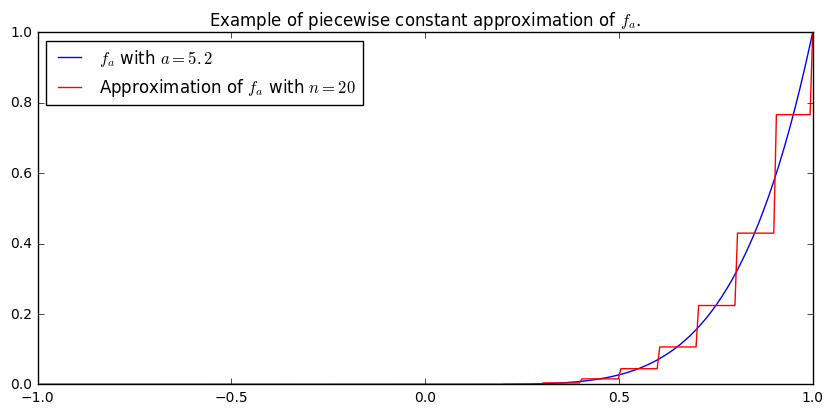

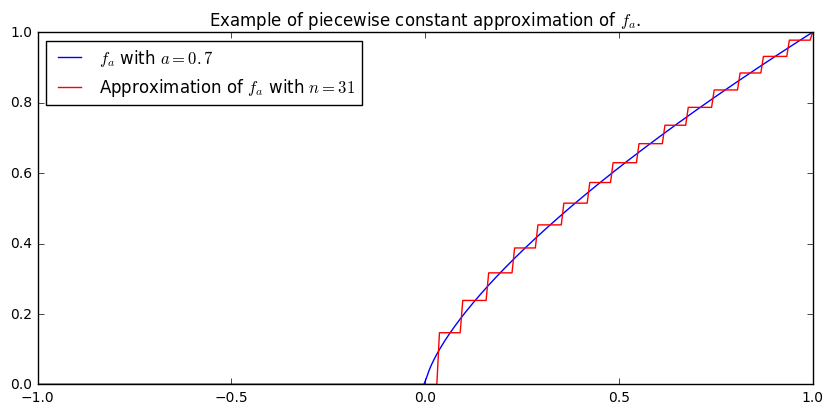

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

def f(a,x):
    # This is the function f_a with a as a parameter
    return 0 if (x <= 0) else pow(x,a)

def pieceConst(n, f, x):
    # This function returns a function that approximates f
    # with piecewise constant functions on n uniform intervals of [-1,1]
    if x == 1: return 1 # algo does not work when x = 1
    k = np.floor((x+1)*n/2) # x is in the k-th interval from the left
    return f((2*k+1)/n-1) # f applied to the midpoint of the interval

#Plotting two examples
for (a,n) in [(5.2, 20), (0.7, 31)]:
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,'b', label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(pieceConst, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,'r', label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Example of piecewise constant approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

We now compute the error. This is done easily because we clearly see the maximum errors are at the boundaries of the interval. Moreover, we see that it happens when the derivative is the highest. We infer that for $a \geq 1$, since the derivative is monotonically increasing, the maximum error happens in the last interval and is equal to $f(m) - f(1) = f(m)-1$ where $m$ is the midpoint of the interval $[1-\frac{2}{n}, 1]$, i.e.: $m= 1-\frac{1}{n}$. For $m < 1$, the derivative is highest at 0, but the analysis is more complicated because we have to consider even and odd $n$'s separately.

If $n$ is even, the highest error is at 0 because the value of the approximation changes there, hence it is equal to $f(m) -f(0) = f(m)$ where $m$ is the midpoint of the interval $[0,\frac{2}{n}]$, i.e.: $m = \frac{1}{n}$. If $n$ is odd, the highest error is not at 0 because it is the midpoint of an interval. Hence, it is in the first boundary after 0, which is at $\frac{1}{n}$, so we end up with the same error: $f(\frac{1}{n})$.

We plot these errors as $n$ grows for different values of $a$ around 1. We observe that it indeed behaves like $n^{-r}$ for some $r$. We only see the assymptotic behavious in our graph because the scale makes the small values of $n$ less visible.

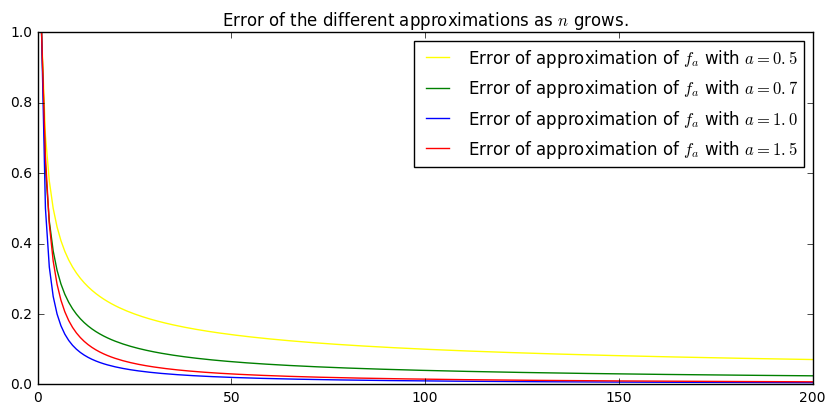

In [3]:
def err(f,a,n):
    # this function computes the error as described above
    return 1-f(1-1/n) if a >= 1 else f(1/n)
colors = ['yellow', 'green', 'blue', 'red'] # colors for the different plots
fig = plt.figure(figsize=(10,10))
n = range(1,201)
vala = [0.5,0.7,1,1.5]
for i in range(len(vala)):
    fa = partial(f, vala[i])
    errf = partial(err, fa, vala[i])
    errors = list(map(errf, n))
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(vala[i]))
ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

We confirm that the error grows like $n^{-r}$ for some $r$ that grows with the regularity of the function. This is because for values of $a$ closer to 0 or far from 1, the curves go down slowly and for values close to 1, the curves go down fast. The curves are very nice, so we conclude that the asymptotic regime starts very early. By looking at different curves for different values of $a$, we guess the relation between $r$ and $a$ is $r(a) = a$ for $a < 1$ and it is $r(a) = 1$ for $a \geq 1$. However, we observe that for $a \geq 1$ and $a$ far from 1, the curve is shifted upward compared to $a=1$ until large values for $n$.

## Q3 - Piecewise linear approximations of $f_a$

In each interval, we approximate the $f_a$ with a line that goes from the value of $f_a$ at the leftmost point to the value of $f_a$ at the rightmost point.

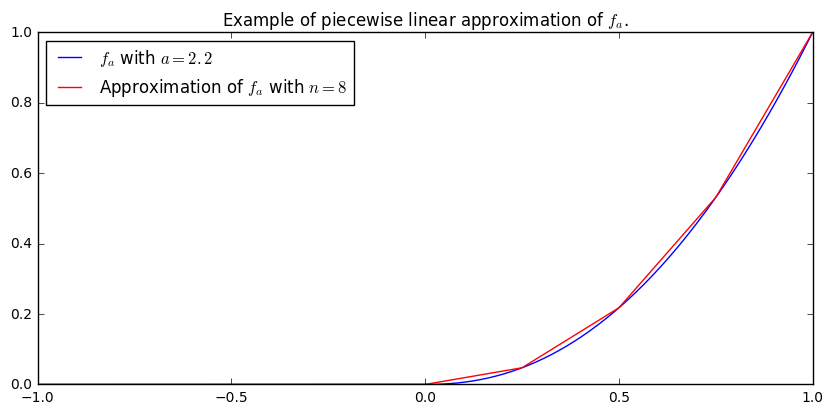

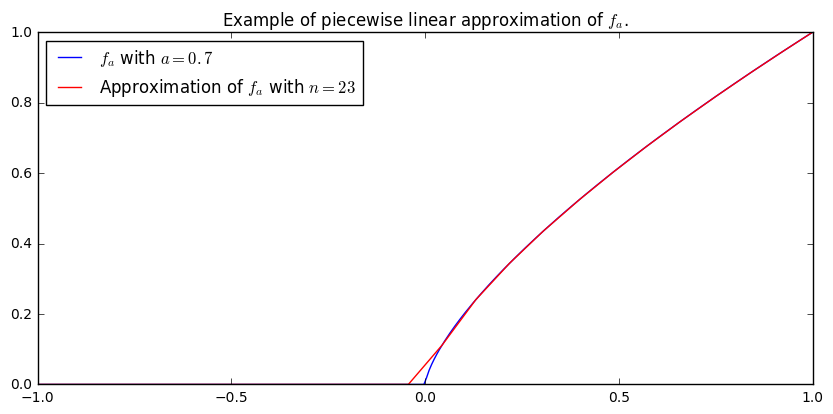

In [8]:
def pieceLin(n, f, x):
    # This function returns a function that approximates f
    # with piecewise constant functions on n uniform intervals of [-1,1]
    if x == 1: return 1 # if x =1 algo does not work, so just return 1
    k = np.floor((x+1)*n/2) # x is in the k-th interval from the left
    low, up = 2*k/n-1, 2*(k+1)/n-1 #letftmost and rightmost point of interval
    slope = (f(up) - f(low))*n/2 # finding the slope of the line
    y_inter = f(low) - slope*low # finding the vertical shift of the line
    return slope*x+y_inter # f applied to the midpoint of the interval

#Drawing two examples
for (a,n) in [(2.2, 8), (0.7, 23)]:
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,'b', label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(pieceLin, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,'r', label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Example of piecewise linear approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()
    
#Plotting and fitting the plot
#plt.scatter(x,y)
#fits = np.polyfit(np.log2(x[4:]), y[4:], 1)
#print(fits[0])
#y = [fits[0]*np.log2(x[i]) + fits[1] for i in range(len(x))]
#plt.plot(x,y, 'red')
#plt.xscale('log', basex=2)
#plt.show()

Let us compute the error now. We use the uniform error with 300 sample points on the interval.

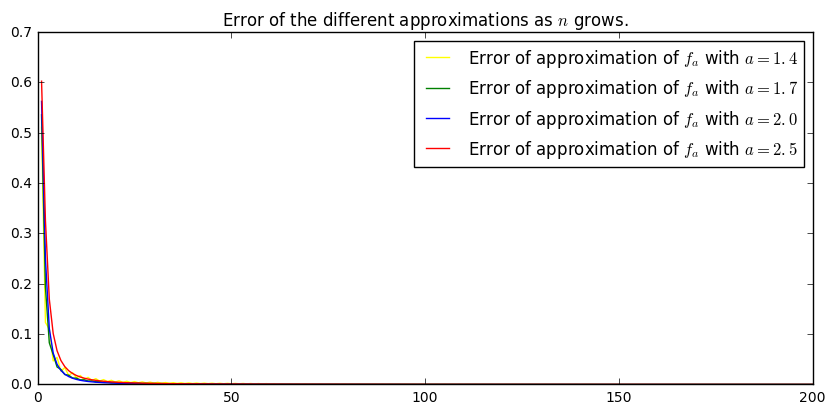

In [18]:
def unifNorm(f1, f2, low = -1, up = 1, numPoints = 300):
    # computes the uniform distance between f1 and f2 between -1 and 1 with numPoints points
    return max([abs(f1(p) - f2(p)) for p in np.linspace(low, up, numPoints)])

def errLin(f,n):
    # this function computes the error as described above
    appf = partial(pieceLin, n, f)
    return unifNorm(f, appf)

colors = ['yellow', 'green', 'blue', 'red'] # colors for the different plots
fig = plt.figure(figsize=(10,10))
n = range(1,201)
vala = [1.4,1.7,2,2.5]
for i in range(len(vala)):
    fa = partial(f, vala[i])
    errf = partial(errLin, fa)
    errors = list(map(errf, n))
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(vala[i]))

ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

Again, we confirm that the error grows like $n^{-r}$ for some $r$. We see that all the curves have the same rate of convergence which is around $r = 2$. The curves are less regular because for an odd number of intervals, 0 becomes the middle of an interval, so we have to approximate a big jump near 0 with a linear curve and we get more error. Nevertheless, the asymptotic behaviour is still observed. Compared to the piecewise constant approximations, we have a higher rate of convergence, meaning that linear curves are better at approximating the function than constant functions (which is obvious because the space of linear functions includes the space of constant functions).

## Q4 - Bernstein polynomial approximations for $f_a$

We recall the definition of Bernstein polynomials and how to approximate a function with them. Let $n$ be the order of the approximation, the Bernstein polynomials are 
$$ b_{n,k}(x) = \binom{n}{k}(1-x)^{n-k}x^k \mbox{ for $k = 0,\dots, n$.}$$
Then, the approximation of a function $f$ is
$$ p_n(x) = \sum_{k=0}^n f(\frac{k}{n})b_{n,k}(x).$$
This setting works to approximate in the interval $[0,1]$, but since we are working in $[-1,1]$, we need to do to the following scaling $x = \frac{x+1}{2}$.

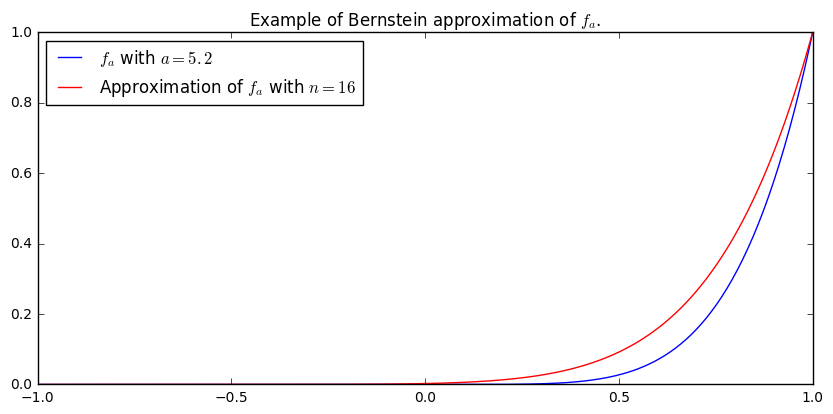

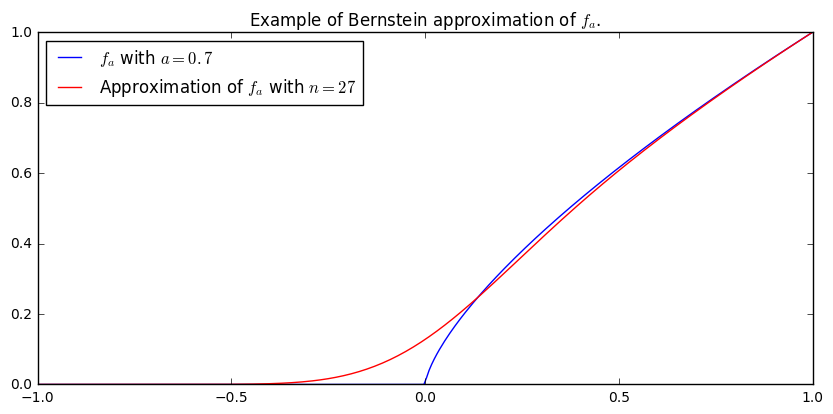

In [14]:
from scipy.special import binom
def bernPol(n,x,k):
    #This computes b_{n,k}(x)
    return binom(n,k)*pow(1-x,n-k)*pow(x,k)

def approxBern(n, f, x):
    # This computes the approximation of f at x in [-1,1]
    # with n-th order bernstein polynomials
    bern = partial(bernPol, n, (x+1)/2) #This is nth order bernstein polynomial at x with k as parameter
    return sum([f(-1+2*k/n)*bern(k) for k in range(n+1)])

#Drawing two examples
for (a,n) in [(5.2, 16), (0.7, 27)]:
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,'b', label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(approxBern, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,'r', label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Example of Bernstein approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

Again, we compute the error with the uniform distance.

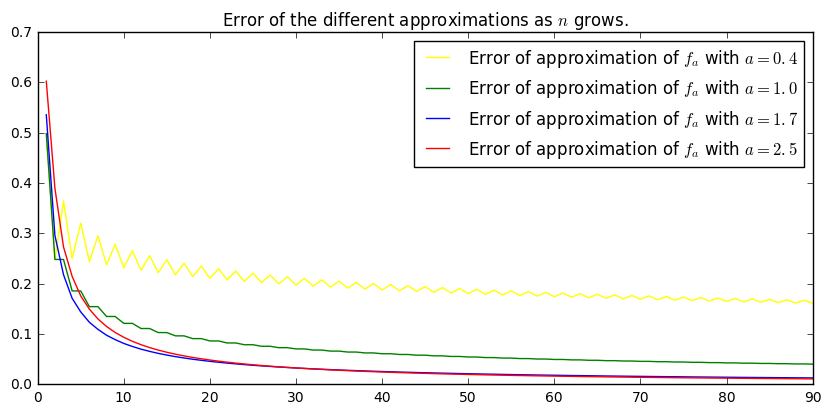

In [16]:
def errBern(f,n):
    # this function computes the error as described above
    appf = partial(approxBern, n, f)
    return unifNorm(f, appf)

colors = ['yellow', 'green', 'blue', 'red'] # colors for the different plots
fig = plt.figure(figsize=(10,10))
n = range(1,91)
vala = [0.4,1,1.7,2.5]
for i in range(len(vala)):
    fa = partial(f, vala[i])
    errf = partial(errBern, fa)
    errors = list(map(errf, n))
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(vala[i]))

ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

Again, we confirm that the error grows like $n^{-r}$ for some $r$. This time, not all the curves have the same rate of convergence. For $a \leq 1$, we have a sawtooth behaviour probably related to the parity of the degree of the polynomial that changes its behaviour. The rate of convergence for $a =0.4$ is $r \approx 1/3$, for $a=1$ we get $r\approx 1/2$, for $a =1.7$ and $a =2.5$, we get $r \approx 1$. We get worse convergence than for linear and constants, meaning it is more practical to approximate with piecewise functions than polynomials on a whole interval.

## Q5 - Chebyshev interpolations for $f_a$
We use Lagrange interpolation on Chebyshev nodes to approximate our function, all the code here was borrowed from previous labs.

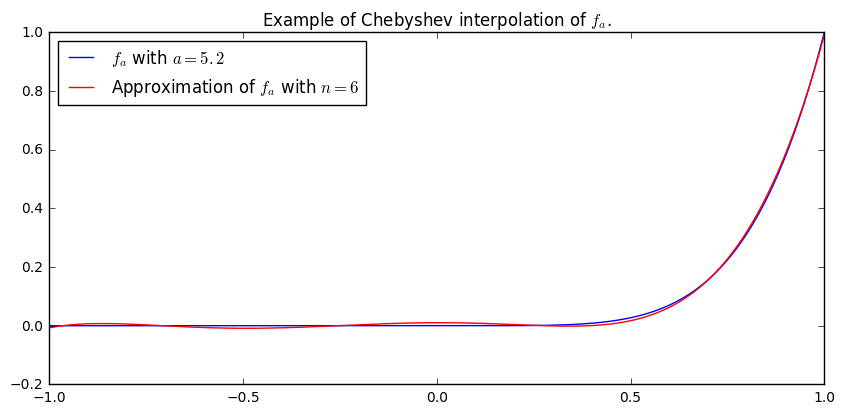

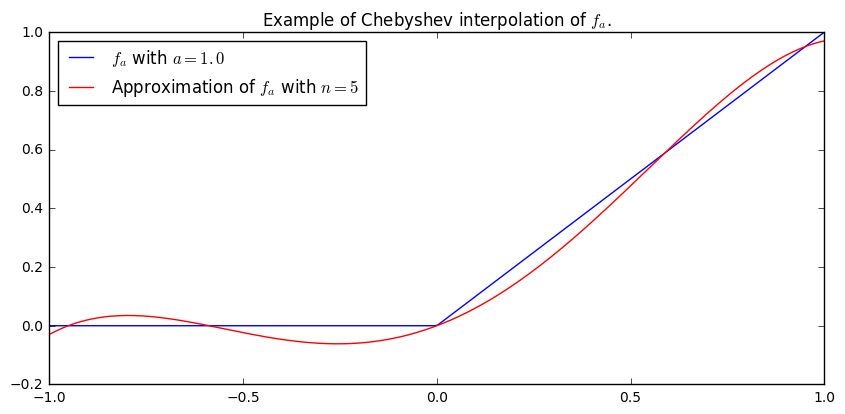

In [137]:
def evalPoly(a, x):
    # evaluates a polynomial defined with its coefficients at x
    return sum([a[i]*pow(x,i) for i in range(len(a))])

def lagrange(x, y):
    # Uses the Vandermonde matrix to find the coefficients
    # a_i of the Lagrange polynomial for the interpolation problem
    # with data x and y.
    vmonde = np.zeros((len(x), len(x))) # initialize matrix with zeros
    for i in range(len(vmonde)): 
        for j in range(len(vmonde)):
            vmonde[i,j] = pow(x[i], j) #put x_i^j in (i,j) coordinate
    return np.linalg.solve(vmonde, y) # solve the system Ma = y returning the coefficients a

def cheb(n):
    # gives the Chebyshev nodes.
    return [np.cos((2*i-1)*np.pi/(2*n)) for i in range(1,n+1)]

#Drawing two examples
for (a,n) in [(5.2, 6), (1, 5)]:
    fa = partial(f,a)
    # getting the lagrange Polynomial for fa
    nodes = cheb(n)
    coeffs = lagrange(nodes,list(map(fa,nodes)))
    appfa = partial(evalPoly, coeffs)
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    y = list(map(fa, x))
    ax1.plot(x,y,'b', label = '$f_a$ with $a=%.1f$'%(a))
    y = list(map(appfa, x))
    ax1.plot(x,y,'r', label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Example of Chebyshev interpolation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

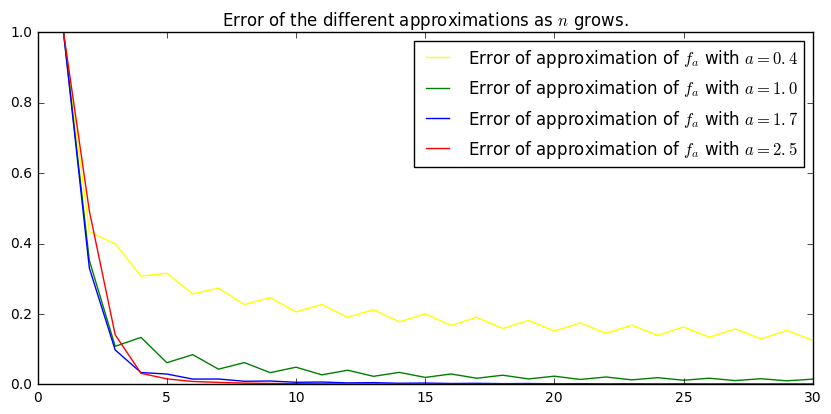

In [140]:
def errCheb(f,n):
    # this function computes the error as described above
    # getting the lagrange Polynomial for fa
    nodes = cheb(n)
    coeffs = lagrange(nodes,list(map(f,nodes)))
    appf = partial(evalPoly, coeffs)
    return unifNorm(f, appf, -1,1, 300)

colors = ['yellow', 'green', 'blue', 'red'] # colors for the different plots
fig = plt.figure(figsize=(10,10))
n = range(1,31)
vala = [0.4,1,1.7,2.5]
for i in range(len(vala)):
    fa = partial(f, vala[i])
    errf = partial(errCheb, fa)
    errors = list(map(errf, n))
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(vala[i]))

ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

Again, we confirm that the error grows like $n^{-r}$ for some $r$. This time, not all the curves have the same rate of convergence. For $a = 0.4$, we have $r \approx 0.6$, for $a = 1$, we have $r \approx 1.8$, for $a = 1.7$ and $a= 2.5$, we have $r\approx 2.5$. The asymptotic regime starts early just like in Q1 although the curves have some kind of sawtooth shape, this clearly comes from the fact that odd and even degree polynomials behave differently. Compared to the piecewise constant approximations, we have a higher rate of convergence but when $a$ is sligthly below 1. However, linear approximations have similar rates of convergence for the ranges we observe. We get better convergence than for Bernstein polynomials, but we still see that piecewise functions are better to appoximate our function especially if we consider that it takes more time to compute the Chebyshev interpolation for large values of $n$.